[0, 2.0, 3.15, 3.86, 4.455, 4.875, 5.27, 5.61, 5.995, 6.32, 6.69, 7.01, 7.26, 7.585, 7.91, 8.135, 8.42, 8.645, 8.865, 9.085, 9.41, 9.67, 9.915, 10.23, 10.445, 10.635, 10.935, 11.125, 11.32, 11.48, 11.645, 11.825, 11.97, 12.095, 12.275, 12.395, 12.57, 12.745, 12.93, 13.005, 13.18, 13.34, 13.535, 13.69, 13.825, 13.985, 14.135, 14.3, 14.425, 14.58, 14.725, 14.845, 15.04, 15.175, 15.355, 15.475, 15.615, 15.775, 15.93, 16.015, 16.16, 16.35, 16.46, 16.6, 16.74, 16.84, 16.97, 17.105, 17.195, 17.295, 17.485, 17.6, 17.73, 17.84, 17.98, 18.08, 18.22, 18.385, 18.505, 18.6, 18.785, 18.9, 19.0, 19.075, 19.2, 19.355, 19.47, 19.56, 19.665, 19.775, 19.91, 20.045, 20.13, 20.25, 20.37, 20.495, 20.56, 20.665, 20.81, 20.93, 21.045, 21.21, 21.315, 21.41, 21.485, 21.62, 21.69, 21.775, 21.895, 21.965, 22.105, 22.18, 22.315, 22.495, 22.625, 22.725, 22.82, 22.92, 23.0, 23.095, 23.22, 23.34, 23.445, 23.57, 23.675, 23.775, 23.905, 24.01, 24.075, 24.175, 24.205, 24.265, 24.335, 24.43, 24.5, 24.58, 24.65, 24.745, 

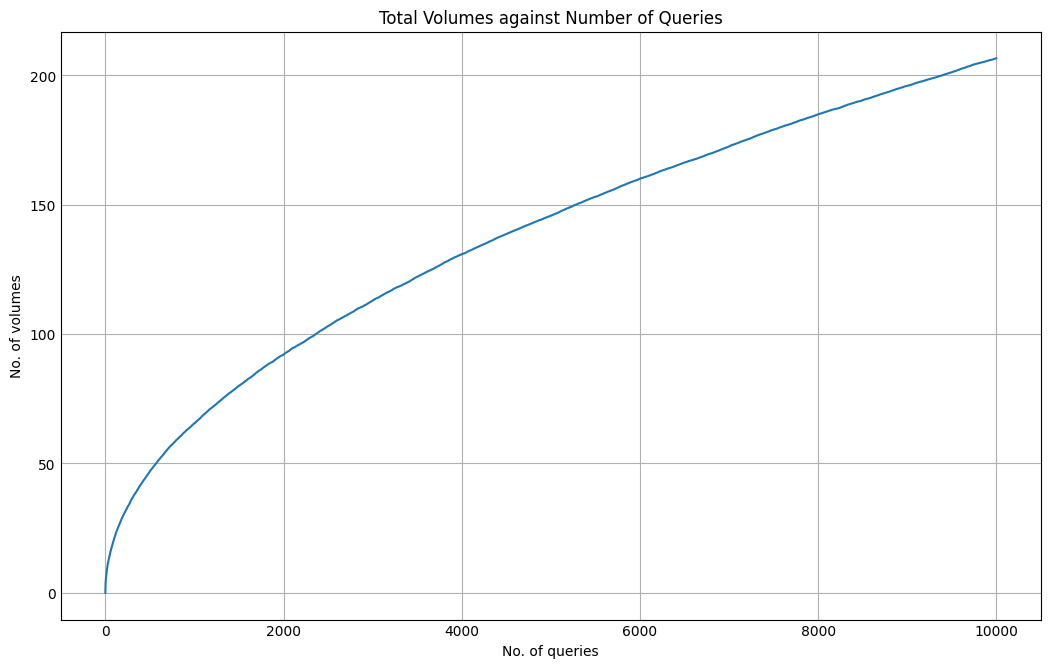

In [2]:
import math
import random 
import matplotlib.pyplot as plt 

#overcoverwithreplacement

RSEmax = 2048

def is_power_of_two(x):
    return (x & (x - 1)) == 0

def overcover(start, end):
    diff = (end - start) - 1
    while True:
        diff += 1
        if is_power_of_two(diff + 1):  # Check if diff + 1 is a power of 2
            N = math.log(diff + 1, 2)
            break
    if start == end:
        return (start, end)
    else:
        for i in range(int(N), int(math.log(RSEmax, 2)) + 1):  # Ensure N is an integer
            for j in range(0, start):
                if (start - j) % 2**i == 1:
                    if start - j + 2 ** i - 1 >= end:
                        return (start - j, start - j + 2 ** i - 1)
                    else:
                        break

query_range_list = []
for i in range (RSEmax):
    for j in range (i+1):
        query_range_list.append(j)

def query_gen():
    no_range = random.choice(query_range_list)

    first_int = random.randint(1, RSEmax-no_range)
    query = (first_int, first_int+no_range)
    return(query)

max_volumes = 2*RSEmax - 1
no_of_runs = 200
no_of_queries = 10000
def overcover_query(no_of_runs, no_of_queries):
    arr = [0 for i in range(no_of_queries+1)]
    for h in range(no_of_runs):
        vol_tracker = []
        vol_sum = 0
        query_tracker = []
        for j in range(no_of_queries):
            query_asked = query_gen()
            if len(vol_tracker) == max_volumes: 
                for i in range(max_volumes, no_of_queries):
                    arr[i+1] = max_volumes*no_of_runs
                break   
            if len(query_tracker) == int((RSEmax*(RSEmax + 1))/2):
                break   
            query_tracker.append(query_asked)
            (a, b) = query_asked
            query_list = overcover(a, b)
            for i in query_list:
                if i not in vol_tracker:
                    vol_tracker.append(i)
                    vol_sum +=1
            arr[j+1] = arr[j+1] + vol_sum
                
    for i in range(no_of_queries):
        arr[i+1] = arr[i+1] /no_of_runs
    return(arr)

arr = overcover_query(no_of_runs,no_of_queries) 
print (arr)

plt.style.use('_mpl-gallery')
plt.figure(figsize=(10,6))
plt.plot(arr)
plt.xlabel("No. of queries")  
plt.ylabel("No. of volumes")  
plt.title("Total Volumes against Number of Queries")  
plt.show()